### **Analisis Sentimen Vaksin Covid-19 pada Sosial Media Twitter**

September 2021

In [1]:
!pip install tweet-preprocessor
!pip install google_trans_new
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Crawling Data

In [2]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
from time import time
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
consumer_key = "V7GE7zkApgNKiHQNccDDKwCx5"
consumer_secret = "RDmFbLd4Wr9EY2l5LCht2csvP9VcWpwmqvPO8OdTKBkxRZPKio"
access_token = "1065255864125206531-I2YoDmTc9o6V3TVGSpkodSFT8wSiYO"
access_token_secret = "REsy1Q8qexkjMjAqS7annj0s8iAHdAsdFrJYP1mzpUASi"

# Autentifikasi Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
def scraptweets(search_words, date_since, date_until):
# Membuat Data Frame
    db_tweets = pd.DataFrame(columns=['username', 'tweetcreatedts', 'text'])

    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="en", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(1000)
# Mengubah Kumpulan Data Dalam Array List
    tweet_list = [tweet for tweet in tweets]

# Melakukan Perulangan Untuk Data Tweet Untuk Dimasukkan Kedalam CSV
    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at

        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text

        ith_tweet = [username, tweetcreatedts, text]

        db_tweets.loc[len(db_tweets)] = ith_tweet

# Export Data Tweet Ke File CSV    
    print('Jumlah Data', len(db_tweets))
    filename = 'vaksin_tweets.csv'
    db_tweets.to_csv(filename, index=False)
# Format Pencarian Data Tweet
today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(7)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "#vaccine OR #vaccinecovid19 OR vaccine"
date_since = last_week
date_until = today

scraptweets(search_words, date_since, date_until)

Jumlah Data 1000


In [5]:
data = pd.read_csv('/content/vaksin_tweets.csv')

In [6]:
data

,username,tweetcreatedts,text
0,Scott12Colin,2022-07-21 23:59:59,@Critapocalypse People labelled 'anti-vax' are...
1,102_virus,2022-07-21 23:59:59,Prominent antivaxers will start pushing misinf...
2,julesboise,2022-07-21 23:59:59,The German Federal Ministry of Health posted a...
3,joshbrody12,2022-07-21 23:59:57,@joncoopertweets Ya and if there is ever an ac...
4,Loveamethyst90,2022-07-21 23:59:57,@bennyjohnson Biden is healthy and is physical...
...,...,...,...
995,touchdownjets51,2022-07-21 23:48:38,I have little interest in debating the vaccine...
996,GamerSaiReddy1,2022-07-21 23:48:38,#usnews NYC health chiefs blame Feds for monke...
997,HarleyStone77,2022-07-21 23:48:37,The fact that the BBC made a documentary to tr...
998,billbois,2022-07-21 23:48:36,@atrupar FOR THE LAST FREAKIN' TIME:\n\nA vacc...


In [7]:
data.head()

,username,tweetcreatedts,text
0,Scott12Colin,2022-07-21 23:59:59,@Critapocalypse People labelled 'anti-vax' are...
1,102_virus,2022-07-21 23:59:59,Prominent antivaxers will start pushing misinf...
2,julesboise,2022-07-21 23:59:59,The German Federal Ministry of Health posted a...
3,joshbrody12,2022-07-21 23:59:57,@joncoopertweets Ya and if there is ever an ac...
4,Loveamethyst90,2022-07-21 23:59:57,@bennyjohnson Biden is healthy and is physical...


## 2. Wrangling Data

In [8]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

In [9]:
data.isnull().sum()

username          0
tweetcreatedts    0
text              0
dtype: int64

In [10]:
tweet = data['text']

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [12]:
import re

In [13]:
# remove twitter handles (@user)
data['text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [14]:
data

,username,tweetcreatedts,text
0,Scott12Colin,2022-07-21 23:59:59,People labelled 'anti-vax' are most often not...
1,102_virus,2022-07-21 23:59:59,Prominent antivaxers will start pushing misinf...
2,julesboise,2022-07-21 23:59:59,The German Federal Ministry of Health posted a...
3,joshbrody12,2022-07-21 23:59:57,Ya and if there is ever an actual vaccine aga...
4,Loveamethyst90,2022-07-21 23:59:57,"Biden is healthy and is physically active, ad..."
...,...,...,...
995,touchdownjets51,2022-07-21 23:48:38,I have little interest in debating the vaccine...
996,GamerSaiReddy1,2022-07-21 23:48:38,#usnews NYC health chiefs blame Feds for monke...
997,HarleyStone77,2022-07-21 23:48:37,The fact that the BBC made a documentary to tr...
998,billbois,2022-07-21 23:48:36,FOR THE LAST FREAKIN' TIME:\n\nA vaccine does...


In [15]:
# remove special characters, numbers, punctuations
data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [16]:
data['text'] = data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
data

,username,tweetcreatedts,text
0,Scott12Colin,2022-07-21 23:59:59,People labelled anti most often anti They labe...
1,102_virus,2022-07-21 23:59:59,Prominent antivaxers will start pushing misinf...
2,julesboise,2022-07-21 23:59:59,German Federal Ministry Health posted stunning...
3,joshbrody12,2022-07-21 23:59:57,there ever actual vaccine against against Covi...
4,Loveamethyst90,2022-07-21 23:59:57,Biden healthy physically active adding getting...
...,...,...,...
995,touchdownjets51,2022-07-21 23:48:38,have little interest debating vaccine with any...
996,GamerSaiReddy1,2022-07-21 23:48:38,#usnews health chiefs blame Feds monkeypox cas...
997,HarleyStone77,2022-07-21 23:48:37,fact that made documentary shame humiliate bul...
998,billbois,2022-07-21 23:48:36,LAST FREAKIN TIME vaccine doesn prevent spread...


In [18]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['text'] = data['text'].apply(stemming_data)

In [20]:
data_tweet = list(data['text'])
polaritas = 0

sentimen = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        sentimen.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        sentimen.append('Netral')
    else:
        total_negatif += 1
        sentimen.append('Negatif')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 440
Netral = 273
Negatif = 287

Total Data : 1000


In [21]:
sentimen = pd.DataFrame({'klasifikasi': sentimen})
data['klasifikasi'] = sentimen
data.tail()

,username,tweetcreatedts,text,klasifikasi
995,touchdownjets51,2022-07-21 23:48:38,have little interest debating vaccine with any...,Positif
996,GamerSaiReddy1,2022-07-21 23:48:38,#usnews health chiefs blame feds monkeypox cas...,Netral
997,HarleyStone77,2022-07-21 23:48:37,fact that made documentary shame humiliate bul...,Netral
998,billbois,2022-07-21 23:48:36,last freakin time vaccine doesn prevent spread...,Netral
999,123alop,2022-07-21 23:48:36,government vaccine program dangerous corrupt d...,Negatif


In [22]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

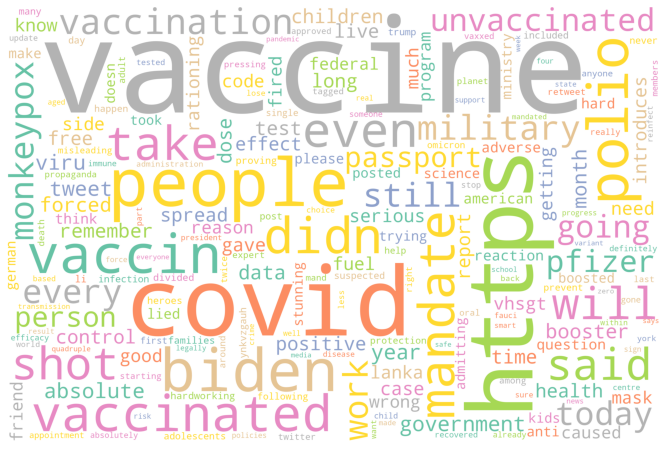

In [23]:
all_words = ' '.join([tweets for tweets in data['text']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

## 3. Visualisasi

In [24]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

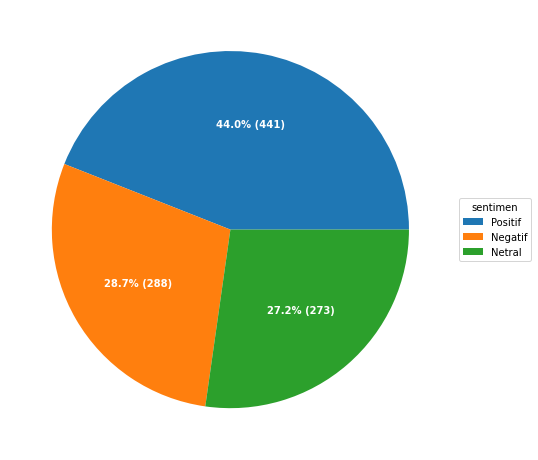

In [25]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "sentimen")

## 4. Modelling

In [26]:
dataset = data.drop(['username','tweetcreatedts'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

x = data['text']
y = data['klasifikasi']

Mengubah data text menjadi float agar dapat dilakukan training pada Decision Tree Classifier

In [37]:
cv = CountVectorizer()
cou_vec = cv.fit_transform(x)
tfidf = TfidfTransformer()
corpus = tfidf.fit_transform(cou_vec)

In [38]:
corpus

<1000x3108 sparse matrix of type '<class 'numpy.float64'>'
	with 17785 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=123)

## 5. Klasifikasi Data dengan Metode Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(x_train,y_train)

y_pred= d_tree.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('akurasi :',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

akurasi : 0.75
[[34  5 17]
 [ 2 42 16]
 [ 7  3 74]]
